In [23]:
import numpy as np

Keys in the truth file:
- runNo
- subRunNo
- eventNo
- geom
- x
- y
- z
- t
- nq
- cluster_id
- q
- e
- type


/tmp/ipykernel_3305854/2850182973.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', max(n_clusters, 10))


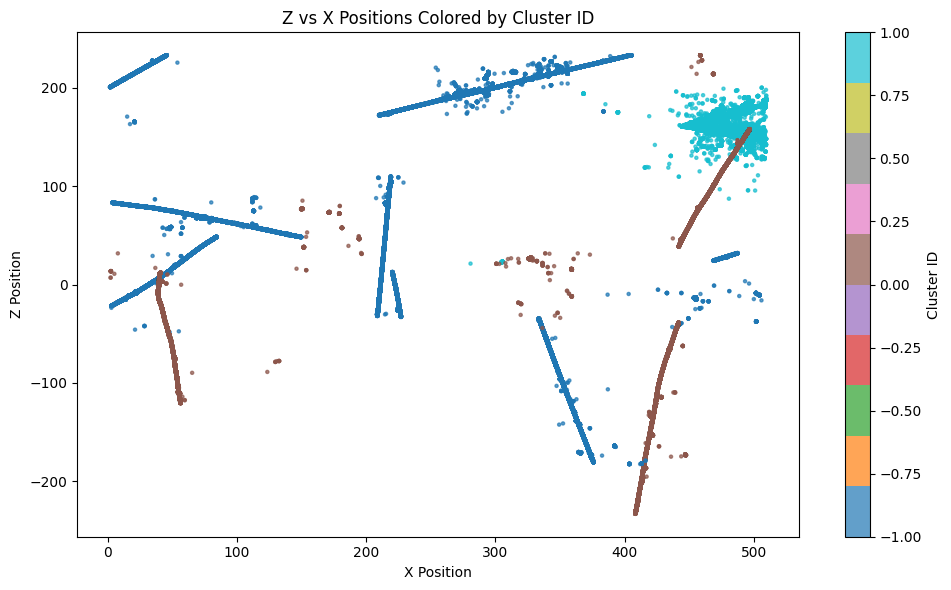

In [24]:
import json
from matplotlib.colors import ListedColormap

truth_file = "bee/data/0/0-truthDepo-Particle.json"
# Load the truth file
with open(truth_file, 'r') as f:
    truth_data = json.load(f)

# List the keys in the truth file
print("Keys in the truth file:")
for key in truth_data.keys():
    print(f"- {key}")

# Create a scatter plot for x vs z with cluster_id as color
import matplotlib.pyplot as plt

# Get unique cluster IDs for color mapping
unique_clusters = np.unique(truth_data['cluster_id'])
n_clusters = len(unique_clusters)

# Create a colormap with enough distinct colors
cmap = plt.cm.get_cmap('tab10', max(n_clusters, 10))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(truth_data['z'], truth_data['x'], 
                     c=truth_data['q'], 
                     cmap=cmap,
                     alpha=0.7,
                     s=5)

plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('X Position')
plt.ylabel('Z Position')
plt.title('Z vs X Positions Colored by Cluster ID')
plt.tight_layout()
plt.show()

In [25]:
# Load the NPZ file
g2f_file = "g2f-apa1-face1-1-1-1.npz"
g2f_data = np.load(g2f_file)

# Print the keys in the NPZ file
print(f"Keys in the {g2f_file} file:")
for key in g2f_data.keys():
    print(f"- {key}")

Keys in the g2f-apa1-face1-1-1-1.npz file:
- blobs
- points
- ppedges


In [26]:
# Load points data as numpy array
points = g2f_data['points']

# Print dimensions and shape information
print(f"Points data type: {type(points)}")
print(f"Points shape: {points.shape}")
print(f"Points dimensions: {points.ndim}")

# Display first few points to understand the structure
print("\nFirst 5 points:")
print(points[:5])

# If points have additional structure, explore it
if points.ndim > 1:
    print(f"\nEach point has {points.shape[1]} features")

Points data type: <class 'numpy.ndarray'>
Points shape: (41566, 5)
Points dimensions: 2

First 5 points:
[[2.3898000e+02 5.2221509e+02 3.0765000e+03 3.4058337e+02 0.0000000e+00]
 [2.3898000e+02 5.1182278e+02 3.0765000e+03 3.4058337e+02 0.0000000e+00]
 [2.3898000e+02 5.0835870e+02 3.0765000e+03 3.4058337e+02 0.0000000e+00]
 [2.3898000e+02 5.1528247e+02 3.0765000e+03 3.4058337e+02 0.0000000e+00]
 [2.3586000e+02 5.2741125e+02 3.0735000e+03 2.5592202e+03 1.0000000e+00]]

Each point has 5 features


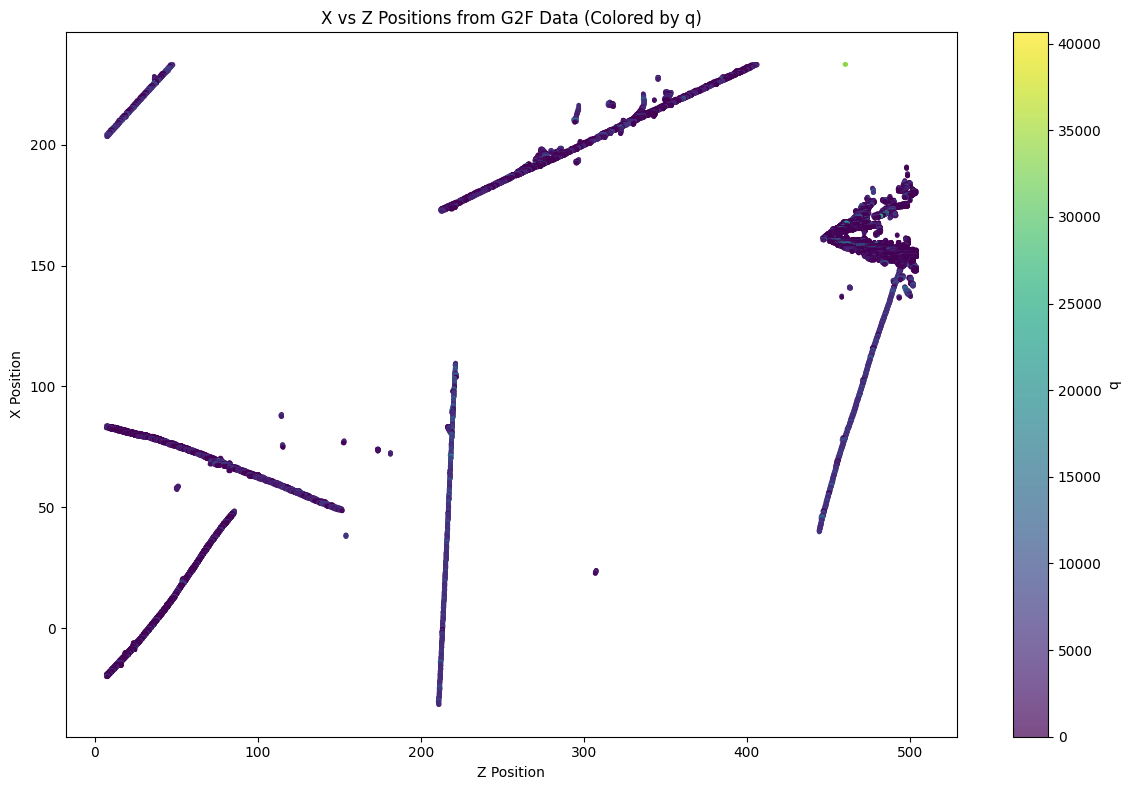

Number of points: 41566
X range: -31.64 to 233.25
Z range: 6.90 to 504.30
Number of unique blobs: 6030


In [27]:
# the points data columns are: x,y, z, q, blob_idx
# Extract x, y, z, q and blob_idx from points
x = points[:, 0]/10.
y = points[:, 1]/10.
z = points[:, 2]/10.
q = points[:, 3]
blob_idx = points[:, 4]

# Create a scatter plot of x vs z
plt.figure(figsize=(12, 8))
scatter = plt.scatter(z, x, 
                     c=q,  # Color by blob index
                     cmap='viridis',
                     alpha=0.7,
                     s=5)

plt.colorbar(scatter, label='q')
plt.xlabel('Z Position')
plt.ylabel('X Position')
plt.title('X vs Z Positions from G2F Data (Colored by q)')
plt.tight_layout()
plt.show()

# Display basic statistics
print(f"Number of points: {len(points)}")
print(f"X range: {x.min():.2f} to {x.max():.2f}")
print(f"Z range: {z.min():.2f} to {z.max():.2f}")
print(f"Number of unique blobs: {len(np.unique(blob_idx))}")

Distance statistics:
Mean distance: 1.90
Median distance: 1.85
Min distance: 0.02
Max distance: 58.90
Standard deviation: 1.67


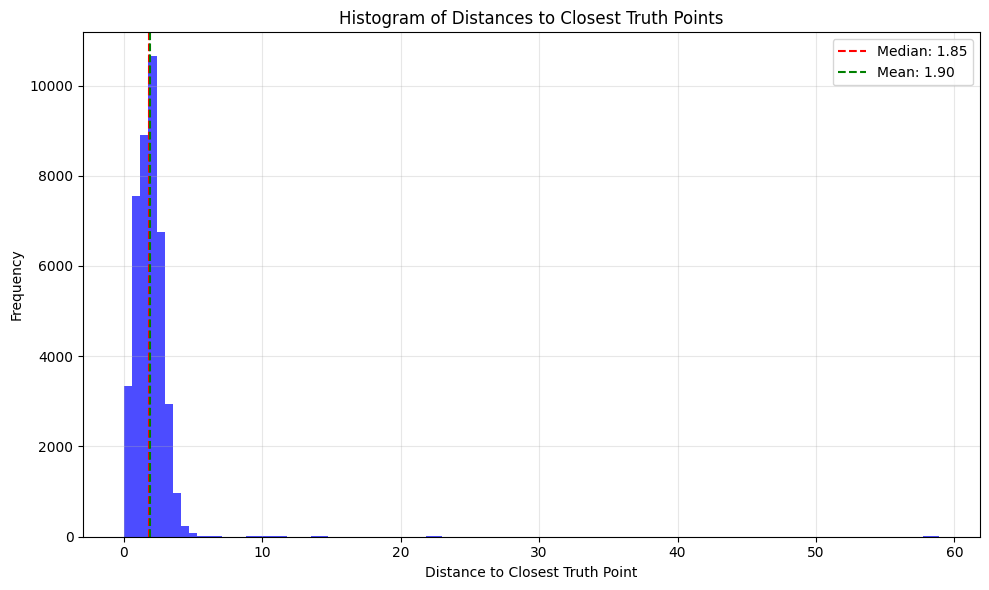

In [28]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

# Extract x, y, z coordinates from truth_data
truth_coords = np.array(list(zip(truth_data['x'], truth_data['y'], truth_data['z'])))

# Create coordinates array from points data
points_coords = np.array(list(zip(x, y, z)))

# Create KNN model for truth data
knn = NearestNeighbors(n_neighbors=1)
knn.fit(truth_coords)

# Find closest point in truth data for each point in points data
distances, indices = knn.kneighbors(points_coords)

# Convert distances to a flat array
distances = distances.flatten()

# Plot histogram of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=100, alpha=0.7, color='blue')
plt.xlabel('Distance to Closest Truth Point')
plt.ylabel('Frequency')
plt.title('Histogram of Distances to Closest Truth Points')
plt.grid(True, alpha=0.3)

# Add some statistics as text
plt.axvline(x=np.median(distances), color='red', linestyle='--', label=f'Median: {np.median(distances):.2f}')
plt.axvline(x=np.mean(distances), color='green', linestyle='--', label=f'Mean: {np.mean(distances):.2f}')
plt.legend()

# Print some statistics
print(f"Distance statistics:")
print(f"Mean distance: {np.mean(distances):.2f}")
print(f"Median distance: {np.median(distances):.2f}")
print(f"Min distance: {np.min(distances):.2f}")
print(f"Max distance: {np.max(distances):.2f}")
print(f"Standard deviation: {np.std(distances):.2f}")

plt.tight_layout()
plt.show()

Number of unique isnu values: 3
Unique isnu values: [-1  0  1]


ValueError: 'list' argument must have no negative elements

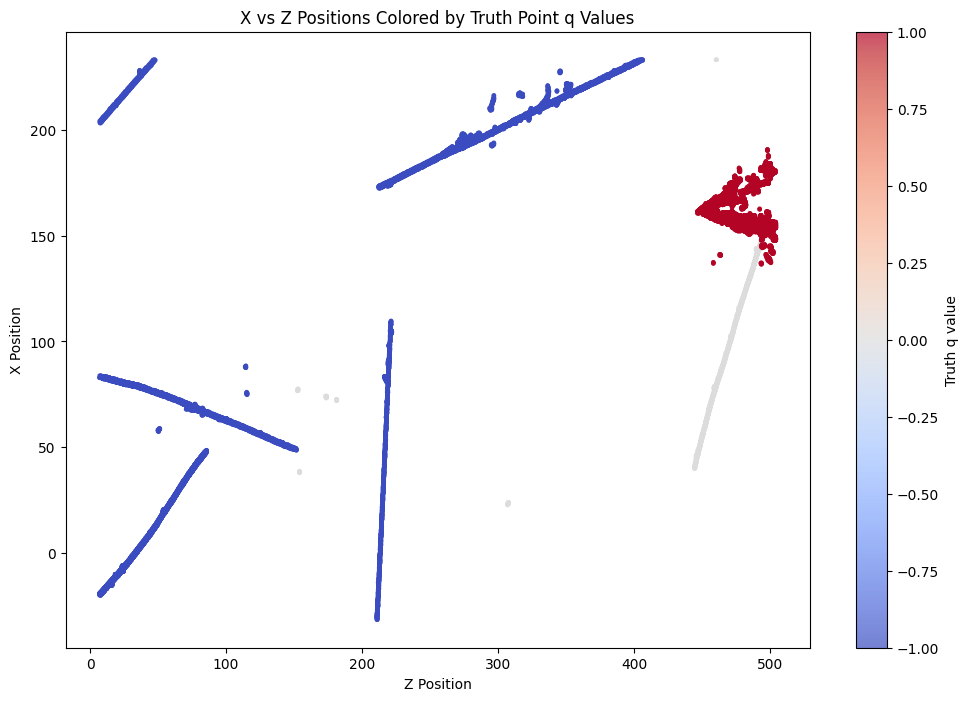

In [29]:
# For each point in points, get the truth_data 'q' value of its nearest neighbor
isnu = np.array([truth_data['q'][idx[0]] for idx in indices])

# Create a scatter plot with points colored by isnu (truth data q values)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(z, x, 
                     c=isnu,  # Color by isnu (truth q value)
                     cmap='coolwarm',
                     alpha=0.7,
                     s=5)

plt.colorbar(scatter, label='Truth q value')
plt.xlabel('Z Position')
plt.ylabel('X Position')
plt.title('X vs Z Positions Colored by Truth Point q Values')

# Print basic statistics about the isnu values
unique_isnu = np.unique(isnu)
print(f"Number of unique isnu values: {len(unique_isnu)}")
print(f"Unique isnu values: {unique_isnu}")
print(f"Most common isnu value: {np.bincount(isnu.astype(int)).argmax()}")

plt.tight_layout()
plt.show()